In [1]:
from openai import OpenAI
from langsmith import wrappers, Client
from langsmith.wrappers import wrap_openai
from langchain_core.runnables import chain
from dotenv import load_dotenv
from os import environ as env

In [2]:
load_dotenv('.env-leo', override=True)
langsmith_key = env.get('LANGSMITH_API_KEY')
openai_api_key = env.get('OPENAI_API_KEY')

# Create a dataset

- Upload a dataset to LangSmith to use for evaluation. For this example, we will upload a pre-made list of input examples.
- For more information on other ways to create and use datasets, check out the [how-to guides](https://docs.smith.langchain.com/evaluation/faq).

In [25]:
# Inputs are provided to your model, so it know what to generate
dataset_inputs = [
  "a rap battle between Atticus Finch and Cicero",
  "a rap battle between Barbie and Oppenheimer",
  # ... add more as desired
]

# Outputs are provided to the evaluator, so it knows what to compare to
# Outputs are optional but recommended.
dataset_outputs = [
    {"must_mention": ["lawyer", "justice"]},
    {"must_mention": ["plastic", "nuclear"]},
]
client = Client()
dataset_name = "Rap Battle Dataset"

# Storing inputs in a dataset lets us
# run chains and LLMs over a shared set of examples.
dataset = client.create_dataset(
    dataset_name=dataset_name,
    description="Rap battle prompts.",
)
client.create_examples(
    inputs=[{"question": q} for q in dataset_inputs],
    outputs=dataset_outputs,
    dataset_id=dataset.id,
)

데이터셋 입력 결과

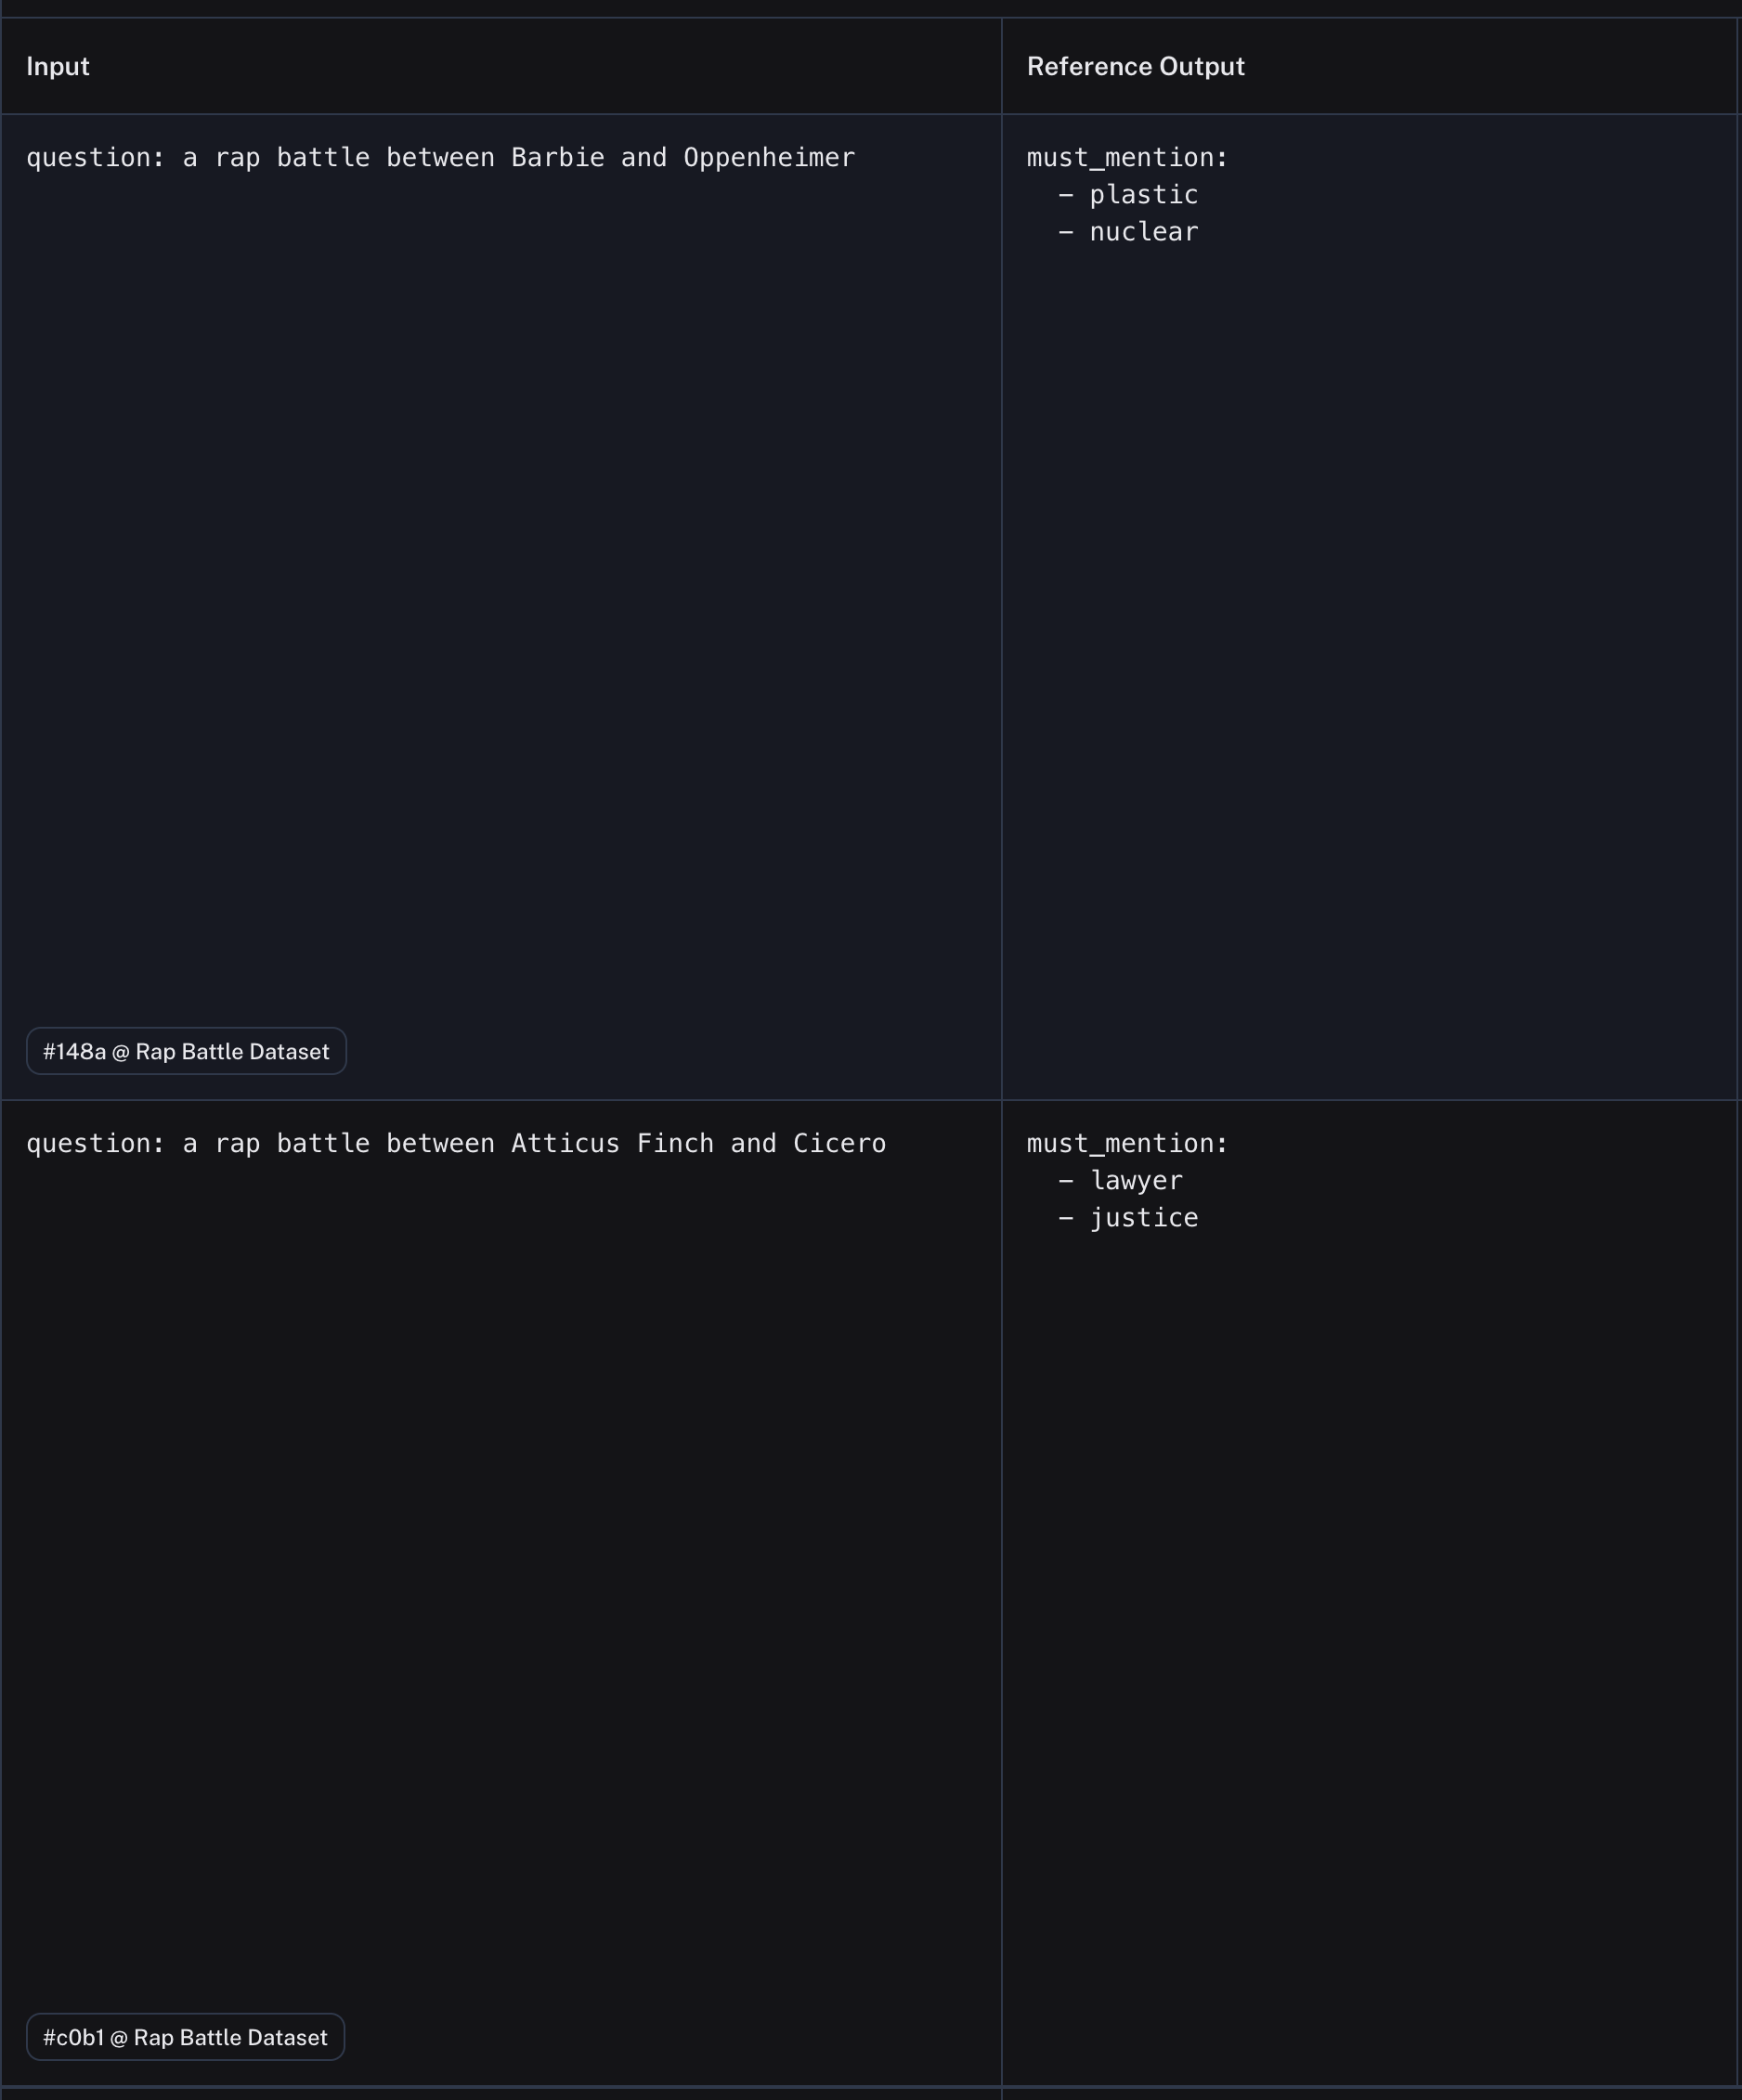